<a href="https://colab.research.google.com/github/ashiqurrahmankhan21st/BreastCancer/blob/main/Breast_Cancer_V7_Gaussion_Cop_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
#import keras_metrics
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Input
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import time

In [2]:
#original data
url = "https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/GC_SDV_BreastCancer.csv"
df = pd.read_csv(url)
del df['Unnamed: 0']
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,12.759,17.02,80.93,509.4,0.06687,0.03913,0.025046,0.016961,0.1493,...,13.858,23.49,88.06,590.4,0.12370,0.13034,0.145731,0.075146,0.2831,0.07432
1,M,11.306,19.79,74.48,390.1,0.10894,0.10373,0.114211,0.053879,0.2135,...,13.389,27.58,90.55,548.5,0.14599,0.26635,0.364920,0.154583,0.4364,0.10487
2,M,12.325,24.63,81.38,484.2,0.11996,0.16272,0.067551,0.047048,0.2181,...,13.615,31.28,92.97,611.2,0.14752,0.37139,0.172141,0.110892,0.3186,0.10515
3,B,10.635,24.89,68.67,341.9,0.08418,0.08830,0.027259,0.006019,0.1938,...,11.340,29.58,75.24,397.9,0.13029,0.15898,0.044588,0.052535,0.2564,0.08163
4,M,28.110,29.74,188.50,2286.8,0.06442,0.06746,0.191878,0.115942,0.1850,...,36.040,36.01,232.15,3615.1,0.11879,0.19572,0.576466,0.216770,0.4201,0.06176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,13.590,25.97,88.89,597.2,0.09826,0.10244,0.048636,0.036183,0.1586,...,14.961,34.97,96.72,719.5,0.14368,0.23676,0.144657,0.096611,0.2627,0.08677
9996,B,13.292,19.63,86.72,554.2,0.09190,0.13122,0.059075,0.031142,0.1773,...,16.561,27.23,109.80,875.1,0.13810,0.30831,0.222822,0.105450,0.3257,0.08708
9997,B,9.346,22.18,60.79,275.9,0.10120,0.09687,0.040308,0.022831,0.1485,...,10.957,34.94,71.87,362.1,0.14212,0.20370,0.096103,0.080021,0.2338,0.10824
9998,B,10.727,19.67,68.48,352.5,0.08418,0.07468,0.078046,0.030488,0.1610,...,11.669,30.02,75.03,408.7,0.13676,0.18993,0.211117,0.100522,0.2035,0.08088


In [3]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

In [4]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,6085
M,3915


In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123,stratify=y)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
y_test_indi_ML = y_test.copy()
print("Original data : ",df.shape)
print("tarin         : ",X_train.shape)
print("test          : ",X_test.shape[0])
#print("validation    : ",X_val.shape[0])

Original data :  (10000, 31)
tarin         :  (8000, 30)
test          :  2000


# SVM

In [6]:
# SVM
st = time.time()
svm = SVC(C=0.1, gamma='auto', kernel = 'rbf',probability=True)
svm.fit(X_train, y_train)
send = time.time() - st
STr = svm.score(X_train, y_train)
STe = svm.score(X_test, y_test)
y_pred_svm = svm.predict(X_test)
(STr,STe, len(y_pred_svm))

(0.757125, 0.755, 2000)

In [7]:
# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SVCX_train, SVCX_test = X[train_index], X[test_index]
    SVCy_train, SVCy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Train SVM
    st = time.time()
    SCVsvm = SVC(C=0.1, gamma='auto', kernel='rbf', probability=True)
    SCVsvm.fit(X_train, y_train)
    elapsed = time.time() - st

    # Scores
    SCVSTr = SCVsvm.score(SVCX_train, SVCy_train)
    SCVSTe = SCVsvm.score(SVCX_test, SVCy_test)

    # Store metrics
    train_scores.append(SCVSTr)
    test_scores.append(SCVSTe)
    times.append(elapsed)

    # Display results
    print(f"Training Accuracy : {SCVSTr:.4f}")
    print(f"Testing Accuracy  : {SCVSTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

SCVSTr = np.mean(train_scores)
SCVSTe = np.mean(test_scores)
SCVsend = np.mean(times)
# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")


Fold 1
Training Accuracy : 0.7586
Testing Accuracy  : 0.7490
Training Time     : 18.77 seconds

Fold 2
Training Accuracy : 0.7584
Testing Accuracy  : 0.7500
Training Time     : 18.85 seconds

Fold 3
Training Accuracy : 0.7512
Testing Accuracy  : 0.7785
Training Time     : 19.46 seconds

Fold 4
Training Accuracy : 0.7588
Testing Accuracy  : 0.7485
Training Time     : 20.73 seconds

Fold 5
Training Accuracy : 0.7565
Testing Accuracy  : 0.7575
Training Time     : 20.98 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.7567
Avg Test Accuracy  : 0.7567
Avg Time per Fold  : 19.76 seconds


#ANN

In [8]:
tf.random.set_seed(123)
st = time.time()

ANNmodel = Sequential()
ANNmodel.add(Input(shape=(X_train.shape[1],)))
ANNmodel.add(Dense(30, activation='relu'))
ANNmodel.add(Dense(15, activation='relu'))
ANNmodel.add(Dense(1, activation='sigmoid'))

ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])
ANNmodel.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.1, verbose=0)

aend = time.time() - st

ATr = ANNmodel.evaluate(X_train, y_train, verbose=0)[1]
ATe = ANNmodel.evaluate(X_test, y_test, verbose=0)[1]
y_pred_ANN = (ANNmodel.predict(X_test, verbose=0) > 0.5).astype("int32")
ATr,ATe, len(y_pred_ANN)

(0.7680000066757202, 0.7599999904632568, 2000)

In [9]:
# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SVCX_train, SVCX_test = X[train_index], X[test_index]
    SVCy_train, SVCy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Build and train ANN
    tf.random.set_seed(123)
    st = time.time()

    SCVANNmodel = Sequential()
    SCVANNmodel.add(Input(shape=(X_train.shape[1],)))
    SCVANNmodel.add(Dense(30, activation='relu'))
    SCVANNmodel.add(Dense(15, activation='relu'))
    SCVANNmodel.add(Dense(1, activation='sigmoid'))

    SCVANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])
    SCVANNmodel.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.1, verbose=0)

    elapsed = time.time() - st

    SCVATr = SCVANNmodel.evaluate(SVCX_train, SVCy_train, verbose=0)[1]
    SCVATe = SCVANNmodel.evaluate(SVCX_test, SVCy_test, verbose=0)[1]

    # Store metrics
    train_scores.append(SCVATr)
    test_scores.append(SCVATe)
    times.append(elapsed)

    # Display results
    print(f"Training Accuracy : {SCVATr:.4f}")
    print(f"Testing Accuracy  : {SCVATe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

SCVATr = np.mean(train_scores)
SCVATe = np.mean(test_scores)
SCVaend = np.mean(times)
# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.7675
Testing Accuracy  : 0.7610
Training Time     : 8.62 seconds

Fold 2
Training Accuracy : 0.7640
Testing Accuracy  : 0.7650
Training Time     : 7.12 seconds

Fold 3
Training Accuracy : 0.7580
Testing Accuracy  : 0.7865
Training Time     : 8.01 seconds

Fold 4
Training Accuracy : 0.7673
Testing Accuracy  : 0.7615
Training Time     : 8.48 seconds

Fold 5
Training Accuracy : 0.7694
Testing Accuracy  : 0.7555
Training Time     : 8.32 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.7652
Avg Test Accuracy  : 0.7659
Avg Time per Fold  : 8.11 seconds


In [10]:
#XGBoost
st = time.time()
xgb = XGBClassifier(objective='binary:logistic',max_depth= 6,alpha= 10,learning_rate= 0.03,n_estimators=250)
xgb.fit(X_train, y_train)
xend = time.time() - st
y_pred_xgb = xgb.predict(X_test)
XTr = accuracy_score(y_train, xgb.predict(X_train))
XTe = accuracy_score(y_test, xgb.predict(X_test))
XTr,XTe, len(y_pred_xgb)

(0.816125, 0.7515, 2000)

In [11]:
# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SVCX_train, SVCX_test = X[train_index], X[test_index]
    SVCy_train, SVCy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Train XGBoost model
    st = time.time()
    SCVxgb = XGBClassifier(
        objective='binary:logistic',
        max_depth=6,
        alpha=10,
        learning_rate=0.03,
        n_estimators=250,
        eval_metric='logloss'
    )
    SCVxgb.fit(SVCX_train, SVCy_train)
    elapsed = time.time() - st

    # Predict
    SVCy_pred_xgb = SCVxgb.predict(SVCX_test)

    # Accuracy scores
    SCVXTr = accuracy_score(SVCy_train, SCVxgb.predict(SVCX_train))
    SCVXTe = accuracy_score(SVCy_test, SVCy_pred_xgb)

    # Store metrics
    train_scores.append(SCVXTr)
    test_scores.append(SCVXTe)
    times.append(elapsed)

    # Display results
    print(f"Training Accuracy : {SCVXTr:.4f}")
    print(f"Testing Accuracy  : {SCVXTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.8196
Testing Accuracy  : 0.7425
Training Time     : 2.43 seconds

Fold 2
Training Accuracy : 0.8230
Testing Accuracy  : 0.7545
Training Time     : 2.47 seconds

Fold 3
Training Accuracy : 0.8163
Testing Accuracy  : 0.7785
Training Time     : 4.25 seconds

Fold 4
Training Accuracy : 0.8149
Testing Accuracy  : 0.7515
Training Time     : 2.37 seconds

Fold 5
Training Accuracy : 0.8254
Testing Accuracy  : 0.7505
Training Time     : 2.48 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.8198
Avg Test Accuracy  : 0.7555
Avg Time per Fold  : 2.80 seconds


In [12]:
#KNN
# Define the range of n_neighbors values to test
n_neighbors_values = [1,3, 5, 7, 9, 11]

best_accuracy = 0.0
best_n_neighbors = None

for n_neighbors in n_neighbors_values:
    print("Number of Neighbors:", n_neighbors)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    test_accuracy = accuracy_score(y_test, knn.predict(X_test))

    print('KNN model train accuracy score: {0:0.4f}'.format(train_accuracy))
    print('KNN model test accuracy score: {0:0.4f}'.format(test_accuracy))
    print()

    # Check if the current test accuracy is better than the previous best
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_n_neighbors = n_neighbors
print("best neighbours: ", best_n_neighbors)

st = time.time()
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
kend = time.time() - st
KTr = accuracy_score(y_train, knn.predict(X_train))
KTe = accuracy_score(y_test, knn.predict(X_test))
y_pred_knn = knn.predict(X_test)
KTr,KTe, len(y_pred_knn)


Number of Neighbors: 1
KNN model train accuracy score: 1.0000
KNN model test accuracy score: 0.6600

Number of Neighbors: 3
KNN model train accuracy score: 0.8337
KNN model test accuracy score: 0.7085

Number of Neighbors: 5
KNN model train accuracy score: 0.7987
KNN model test accuracy score: 0.7200

Number of Neighbors: 7
KNN model train accuracy score: 0.7851
KNN model test accuracy score: 0.7150

Number of Neighbors: 9
KNN model train accuracy score: 0.7746
KNN model test accuracy score: 0.7290

Number of Neighbors: 11
KNN model train accuracy score: 0.7728
KNN model test accuracy score: 0.7375

best neighbours:  11


(0.77275, 0.7375, 2000)

In [13]:
# Track metrics
train_scores = []
test_scores = []
times = []


# Cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SCVX_train, SCVX_test = X[train_index], X[test_index]
    SCVy_train, SCVy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Find the best n_neighbors for this fold


    # Train with best n_neighbors
    st = time.time()
    SCVknn = KNeighborsClassifier(n_neighbors=3)
    SCVknn.fit(SCVX_train, SCVy_train)
    elapsed = time.time() - st

    SCVKTr = accuracy_score(SCVy_train, SCVknn.predict(SCVX_train))
    SCVKTe = accuracy_score(SCVy_test, SCVknn.predict(SCVX_test))

    # Store metrics
    train_scores.append(SCVKTr)
    test_scores.append(SCVKTe)
    times.append(elapsed)

    # Print results
    print(f"Training Accuracy : {SCVKTr:.4f}")
    print(f"Testing Accuracy  : {SCVKTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.8304
Testing Accuracy  : 0.7000
Training Time     : 0.00 seconds

Fold 2
Training Accuracy : 0.8277
Testing Accuracy  : 0.6730
Training Time     : 0.00 seconds

Fold 3
Training Accuracy : 0.8289
Testing Accuracy  : 0.7200
Training Time     : 0.00 seconds

Fold 4
Training Accuracy : 0.8364
Testing Accuracy  : 0.6830
Training Time     : 0.00 seconds

Fold 5
Training Accuracy : 0.8301
Testing Accuracy  : 0.6880
Training Time     : 0.00 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.8307
Avg Test Accuracy  : 0.6928
Avg Time per Fold  : 0.00 seconds


In [14]:
#RF
st = time.time()
rf = RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123)
rf.fit(X_train, y_train)
rend = time.time() - st
RTr = accuracy_score(y_train, rf.predict(X_train))
RTe = accuracy_score(y_test, rf.predict(X_test))
y_pred_rf = rf.predict(X_test)
RTr,RTe, len(y_pred_rf)

(0.751875, 0.7485, 2000)

In [15]:
# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SCVX_train, SCVX_test = X[train_index], X[test_index]
    SCVy_train, SCVy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Train Random Forest
    st = time.time()
    SCVrf = RandomForestClassifier(
        n_estimators=500,
        max_features='sqrt',
        max_samples=100,
        random_state=123
    )
    SCVrf.fit(SCVX_train, SCVy_train)
    elapsed = time.time() - st

    SCVRTr = accuracy_score(SCVy_train, SCVrf.predict(SCVX_train))
    SCVRTe = accuracy_score(SCVy_test, SCVrf.predict(SCVX_test))

    # Store metrics
    train_scores.append(SCVRTr)
    test_scores.append(SCVRTe)
    times.append(elapsed)

    # Print fold results
    print(f"Training Accuracy : {SCVRTr:.4f}")
    print(f"Testing Accuracy  : {SCVRTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.7560
Testing Accuracy  : 0.7360
Training Time     : 1.15 seconds

Fold 2
Training Accuracy : 0.7555
Testing Accuracy  : 0.7410
Training Time     : 1.10 seconds

Fold 3
Training Accuracy : 0.7502
Testing Accuracy  : 0.7745
Training Time     : 1.13 seconds

Fold 4
Training Accuracy : 0.7551
Testing Accuracy  : 0.7365
Training Time     : 1.11 seconds

Fold 5
Training Accuracy : 0.7556
Testing Accuracy  : 0.7470
Training Time     : 1.12 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.7545
Avg Test Accuracy  : 0.7470
Avg Time per Fold  : 1.12 seconds


In [16]:
#LR
st = time.time()
lr = LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123)
lr.fit(X_train, y_train)
lend = time.time() - st
LTr = accuracy_score(y_train, lr.predict(X_train))
LTe = accuracy_score(y_test, lr.predict(X_test))
y_pred_lr = lr.predict(X_test)
LTr,LTe, len(y_pred_lr)

(0.759875, 0.762, 2000)

In [17]:
# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold CV loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SCVX_train, SCVX_test = X[train_index], X[test_index]
    SCVy_train, SCVy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Train Logistic Regression model
    st = time.time()
    SCVlr = LogisticRegression(
        C=0.1,
        penalty='l1',
        solver='liblinear',
        max_iter=1000,
        random_state=123
    )
    SCVlr.fit( SCVX_train,  SCVy_train)
    elapsed = time.time() - st

    SCVLTr = accuracy_score( SCVy_train, SCVlr.predict( SCVX_train))
    SCVLTe = accuracy_score( SCVy_test, SCVlr.predict( SCVX_test))


    # Store metrics
    train_scores.append(SCVLTr)
    test_scores.append(SCVLTe)
    times.append(elapsed)

    # Print fold results
    print(f"Training Accuracy : {SCVLTr:.4f}")
    print(f"Testing Accuracy  : {SCVLTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.7618
Testing Accuracy  : 0.7470
Training Time     : 0.41 seconds

Fold 2
Training Accuracy : 0.7598
Testing Accuracy  : 0.7530
Training Time     : 0.36 seconds

Fold 3
Training Accuracy : 0.7534
Testing Accuracy  : 0.7860
Training Time     : 0.27 seconds

Fold 4
Training Accuracy : 0.7616
Testing Accuracy  : 0.7450
Training Time     : 0.22 seconds

Fold 5
Training Accuracy : 0.7609
Testing Accuracy  : 0.7565
Training Time     : 0.36 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.7595
Avg Test Accuracy  : 0.7575
Avg Time per Fold  : 0.32 seconds


In [18]:
'''
def CVal(ML):

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")
  del df['id']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')

    ML.fit(X_train, y_train)
    y_pred_ML = ML.predict(X_test)


    y_pred.append(y_pred_ML)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]+1

  y_pred_final = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_final.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass
  return y_pred_final
  '''

'\ndef CVal(ML):\n\n  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")\n  del df[\'id\']\n\n  s = 0\n  e = round(df.shape[0]*.2)\n\n  y_pred = []\n  y_original = []\n\n  for i in range(5):\n\n    test_set  = df.iloc[s:e,:]\n    train_set = df.drop(test_set.index)\n\n    X_train = StandardScaler().fit_transform(train_set.drop(columns=[\'diagnosis\'])).copy()\n    y_train = encoder.fit_transform(train_set[\'diagnosis\']).copy()\n    X_test = StandardScaler().fit_transform(test_set.drop(columns=[\'diagnosis\'])).copy()\n    y_test = encoder.fit_transform(test_set[\'diagnosis\']).copy()\n\n    #svm = SVC(C=0.1, gamma=\'auto\', kernel = \'rbf\')\n\n    ML.fit(X_train, y_train)\n    y_pred_ML = ML.predict(X_test)\n\n\n    y_pred.append(y_pred_ML)\n    y_original.append(y_test)\n\n    s = e\n    e = e + round(df.shape[0]*.2)\n    if e-s < round(df.shape[0]*.2):\n      e = df.shape[0]+1\n\n  y_pred_final = []\n  y_original_final = []\n\n  t

In [19]:
def CVal(ML):
    # Load and clean dataset
    df = pd.read_csv(url)
    del df['Unnamed: 0']

    # Separate features and target
    X = df.drop(columns=['diagnosis']).copy()
    y = df['diagnosis'].copy()

    # Encode labels
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Prepare StratifiedKFold

    SCVy_pred = []
    SCVy_original = []

    for train_index, test_index in skf.split(X, y):
        # Split data
        SCVX_train, SCVX_test = X.iloc[train_index], X.iloc[test_index]
        SCVy_train, SCVy_test = y[train_index], y[test_index]

        # Standardize
        scaler = StandardScaler().fit(SCVX_train)
        SCVX_train = scaler.transform(SCVX_train)
        SCVX_test = scaler.transform(SCVX_test)

        # Train model
        ML.fit(SCVX_train, SCVy_train)
        SCVy_pred_ML = ML.predict(SCVX_test)

        # Collect predictions
        SCVy_pred.append(SCVy_pred_ML)
        SCVy_original.append(SCVy_test)

    # Flatten predictions and true labels
    SCVy_pred_final = []
    SCVy_original_final = []

    for i in range(5):
        for j in range(len(SCVy_pred[i])):
            SCVy_pred_final.append(SCVy_pred[i][j])
            SCVy_original_final.append(SCVy_original[i][j])

    return SCVy_pred_final


In [20]:
'''
def CValANN():

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")
  del df['id']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')
    tf.random.set_seed(123)
    ANNmodel = Sequential()
    ANNmodel.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
    ANNmodel.add(Dense(15, activation='relu'))
    ANNmodel.add(Dense(1, activation='sigmoid'))
    ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy']) #tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
    ANNmodel.fit(X_train,y_train, batch_size = 128, epochs = 20, validation_split = 0.1)
    y_pred_ANN = (ANNmodel.predict(X_test) > 0.5).astype("int32")


    y_pred.append(y_pred_ANN)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]

  y_pred_fina = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_fina.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass

  y_pred_final = []

  for i in range(len(y_pred_fina)):
    y_pred_final.append(y_pred_fina[i][0])

  return y_pred_final
  '''

'\ndef CValANN():\n\n  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")\n  del df[\'id\']\n\n  s = 0\n  e = round(df.shape[0]*.2)\n\n  y_pred = []\n  y_original = []\n\n  for i in range(5):\n\n    test_set  = df.iloc[s:e,:]\n    train_set = df.drop(test_set.index)\n\n    X_train = StandardScaler().fit_transform(train_set.drop(columns=[\'diagnosis\'])).copy()\n    y_train = encoder.fit_transform(train_set[\'diagnosis\']).copy()\n    X_test = StandardScaler().fit_transform(test_set.drop(columns=[\'diagnosis\'])).copy()\n    y_test = encoder.fit_transform(test_set[\'diagnosis\']).copy()\n\n    #svm = SVC(C=0.1, gamma=\'auto\', kernel = \'rbf\')\n    tf.random.set_seed(123)\n    ANNmodel = Sequential()\n    ANNmodel.add(Dense(30, activation=\'relu\', input_shape=(X_train.shape[1],)))\n    ANNmodel.add(Dense(15, activation=\'relu\'))\n    ANNmodel.add(Dense(1, activation=\'sigmoid\'))\n    ANNmodel.compile(loss=\'BinaryCrossentropy\', op

In [21]:
def CValANN():
    # Load and preprocess dataset
    df = pd.read_csv(url)
    del df['Unnamed: 0']

    X = df.drop(columns=['diagnosis']).copy()
    y = df['diagnosis'].copy()

    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

    SCVy_pred = []
    SCVy_original = []

    for train_index, test_index in skf.split(X, y):
        SCVX_train, SCVX_test = X.iloc[train_index], X.iloc[test_index]
        SCVy_train, SCVy_test = y[train_index], y[test_index]

        # Standardize
        scaler = StandardScaler().fit(SCVX_train)
        SCVX_train = scaler.transform(SCVX_train)
        SCVX_test = scaler.transform(SCVX_test)

        # ANN Model
        tf.random.set_seed(123)
        ANNmodel = Sequential()
        ANNmodel.add(Input(shape=(X_train.shape[1],)))
        ANNmodel.add(Dense(30, activation='relu'))
        ANNmodel.add(Dense(15, activation='relu'))
        ANNmodel.add(Dense(1, activation='sigmoid'))
        ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])
        ANNmodel.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.1, verbose=0)

        SCVy_pred_ANN = (ANNmodel.predict(SCVX_test, verbose=0) > 0.5).astype("int32")

        SCVy_pred.append(SCVy_pred_ANN)
        SCVy_original.append(SCVy_test)

    SCVy_pred_fina = []
    SCVy_original_final = []

    try:
        for i in range(5):
            for j in range(len(SCVy_pred[i])):
                SCVy_pred_fina.append(SCVy_pred[i][j])
                SCVy_original_final.append(SCVy_original[i][j])
    except:
        pass

    SCVy_pred_final = [val[0] for val in SCVy_pred_fina]

    return SCVy_pred_final


In [22]:
newdata = pd.DataFrame({
    "SVM": CVal(SVC(C=0.1, gamma='auto', kernel = 'rbf'))
})
newdata["KNN"] = CVal(KNeighborsClassifier(n_neighbors=3))
newdata["RF"]  = CVal(RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123))
newdata['LR']  = CVal(LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123))
newdata["ANN"] = CValANN()
newdata["XGB"] = CVal(XGBClassifier(objective='binary:logistic',max_depth= 7,alpha= 10,learning_rate= 1,n_estimators=100))
newdata['y_test'] = encoder.fit_transform(df['diagnosis']).copy()

In [23]:
newdata.head()

,SVM,KNN,RF,LR,ANN,XGB,y_test
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1


In [24]:
# Define the DNN model
DNNX = newdata.drop(columns=['y_test']).copy()
DNNY = newdata.y_test.copy()
DX_train, DX_test, Dy_train, Dy_test = train_test_split(
    DNNX, DNNY, test_size=0.2, random_state=123)

st = time.time()
model = tf.keras.Sequential([
    tf.keras.Input(shape=(DX_train.shape[1],)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(DX_train, Dy_train, epochs=500, batch_size=64, validation_split=0.2, verbose=0)
dend = time.time() - st

In [25]:
#y_pred_DNN = (model.predict(DNNX) > 0.5).astype("int32")
y_pred_DNN = (model.predict(DX_test) > 0.5).astype("int32")
DTr = model.evaluate(DX_train, Dy_train,verbose=0)[1]
DTe = model.evaluate(DX_test, Dy_test,verbose=0)[1]
DTr,DTe, len(y_pred_DNN)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(0.6104999780654907, 0.6014999747276306, 2000)

In [26]:
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import time

# Prepare data
DNNX = newdata.drop(columns=['y_test']).copy()
DNNY = newdata['y_test'].copy()

# Encode labels if necessary
encoder = LabelEncoder()
DNNY = encoder.fit_transform(DNNY)

# Standardize features
scaler = StandardScaler()
DNNX = scaler.fit_transform(DNNX)

# Stratified K-Fold initialization
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold CV loop
for fold, (train_index, test_index) in enumerate(skf.split(DNNX, DNNY)):
    SCVX_train, SCVX_test = DNNX[train_index], DNNX[test_index]
    SCVy_train, SCVy_test = DNNY[train_index], DNNY[test_index]

    print(f"\nFold {fold+1}")

    # Train DNN
    tf.random.set_seed(123)
    st = time.time()

    SCVmodel = tf.keras.Sequential([
        tf.keras.Input(shape=(SCVX_train.shape[1],)),
        tf.keras.layers.Dense(30, activation='relu',),
        tf.keras.layers.Dense(25, activation='relu'),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(15, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dense(2, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    SCVmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    SCVmodel.fit(SCVX_train, SCVy_train, epochs=500, batch_size=64, validation_split=0.2, verbose=0)

    elapsed = time.time() - st

    # Evaluation
    SCVDTr = model.evaluate(SCVX_train, SCVy_train, verbose=0)[1]
    SCVDTe = model.evaluate(SCVX_test, SCVy_test, verbose=0)[1]

    # Store metrics
    train_scores.append(SCVDTr)
    test_scores.append(SCVDTe)
    times.append(elapsed)

    # Print fold results
    print(f"Training Accuracy : {SCVDTr:.4f}")
    print(f"Testing Accuracy  : {SCVDTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.6053
Testing Accuracy  : 0.6030
Training Time     : 305.83 seconds

Fold 2
Training Accuracy : 0.6046
Testing Accuracy  : 0.6055
Training Time     : 307.95 seconds

Fold 3
Training Accuracy : 0.6037
Testing Accuracy  : 0.6090
Training Time     : 311.66 seconds

Fold 4
Training Accuracy : 0.6060
Testing Accuracy  : 0.6000
Training Time     : 298.44 seconds

Fold 5
Training Accuracy : 0.6044
Testing Accuracy  : 0.6065
Training Time     : 309.11 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.6048
Avg Test Accuracy  : 0.6048
Avg Time per Fold  : 306.60 seconds


In [27]:
acc = pd.DataFrame(
    {
    "SVM":[STr,STe, SCVSTr,SCVSTe],
    "KNN":[KTr,KTe, SCVKTr,SCVKTe],
    "RF" :[RTr,RTe, SCVRTr,SCVRTe],
    "LR" :[LTr,LTe, SCVLTr,SCVLTe],
    "ANN":[ATr,ATe, SCVATr,SCVATe],
    "XGB":[XTr,XTe, SCVXTr,SCVXTe],
    "DNN":[DTr,DTe, SCVDTr,SCVDTe]})
acc.index = ["train", "test", "SCVTrain", "SCVTest"]
acc = acc.T
acc

,train,test,SCVTrain,SCVTest
SVM,0.757125,0.7550,0.756700,0.7567
KNN,0.772750,0.7375,0.830125,0.6880
RF,0.751875,0.7485,0.755625,0.7470
LR,0.759875,0.7620,0.760875,0.7565
ANN,0.768000,0.7600,0.765225,0.7659
XGB,0.816125,0.7515,0.825375,0.7505
DNN,0.610500,0.6015,0.604375,0.6065


### **AutoML Individual and AutoML DNN**

In [28]:
#H2O AutoML

In [29]:
!pip install h2o
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()
from h2o.model.segment_models import H2OFrame
from h2o.automl import H2OAutoML
print("All Library Loaded")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 1.2 MB/s eta 0:00:00
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1mdtufzd
  JVM stdout: /tmp/tmp1mdtufzd/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1mdtufzd/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month and 13 days
H2O_cluster_name:,H2O_from_python_unknownUser_o3fouq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


All Library Loaded


In [30]:
#train, valid = hdf.split_frame(ratios=[.8], seed=123)
#hdf = h2o.H2OFrame(df)
#hdf["diagnosis"] = hdf["diagnosis"].asfactor()
hy = "diagnosis"
hx = list(df.columns)
hx.remove(hy)
hdf  = df.copy()
hdf.iloc[:,1:] = StandardScaler().fit_transform(hdf.iloc[:,1:])
hdf.iloc[:,0] = LabelEncoder().fit_transform(hdf.iloc[:,0])
hdf.iloc[:,0] = hdf.iloc[:,0].astype('category')
train1, valid1 = train_test_split(hdf, test_size=0.2,random_state=123)
train = h2o.H2OFrame(train1)
valid = h2o.H2OFrame(valid1)
train["diagnosis"] = train["diagnosis"].asfactor()
valid["diagnosis"] = valid["diagnosis"].asfactor()

st = time.time()
aml = H2OAutoML(max_models = 10, seed = 123, verbosity="info", sort_metric='accuracy')
aml.train(x = hx, y = hy, training_frame = train,
          validation_frame = valid)
autoend = time.time() - st

best_model = aml.get_best_model()
HATr  = best_model.model_performance(train)
HATe  = best_model.model_performance(valid)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
06:54:06.968: Project: AutoML_1_20250511_65406
06:54:06.991: 5-fold cross-validation will be used.
06:54:06.991: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
06:54:07.46: Setting stopping tolerance adaptively based on the training frame: 0.011180339887498949
06:54:07.46: Build control seed: 123
06:54:07.49: training frame: Frame key: AutoML_1_20250511_65406_training_py_1_sid_96f4    cols: 31    rows: 8000  chunks: 2    size: 1926161  checksum: -5743320669190601360
06:54:07.52: validation frame: Frame key: py_2_sid_96f4    cols: 31    rows: 2000  chunks: 1    size: 482912 

In [31]:
#y_pred_h2o = pd.DataFrame(h2o.as_list(best_model.predict(valid)))['predict']
y_pred_h2o = np.array(best_model.predict(valid).as_data_frame(use_multi_thread=True)['predict'])
y_test_h2o = np.array(valid1['diagnosis']).copy().astype(np.int32)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [32]:
lb = aml.leaderboard
lb.head()

model_id,accuracy,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_2_AutoML_1_20250511_65406,0.72875,0.787036,0.570406,0.707883,0.292569,0.433246,0.187702
XGBoost_1_AutoML_1_20250511_65406,0.7325,0.790084,0.561543,0.709019,0.281723,0.430413,0.185256
GBM_3_AutoML_1_20250511_65406,0.744,0.810424,0.514721,0.738005,0.271565,0.413927,0.171336
GBM_4_AutoML_1_20250511_65406,0.745375,0.807908,0.519608,0.735041,0.270187,0.415806,0.172895
DRF_1_AutoML_1_20250511_65406,0.7475,0.807422,0.546058,0.730428,0.266714,0.415065,0.172279
XRT_1_AutoML_1_20250511_65406,0.748375,0.80685,0.539108,0.730502,0.263476,0.415244,0.172428
XGBoost_3_AutoML_1_20250511_65406,0.749375,0.807709,0.522316,0.73413,0.265054,0.416176,0.173203
GBM_2_AutoML_1_20250511_65406,0.751375,0.812922,0.511861,0.738936,0.262692,0.412461,0.170124
GBM_1_AutoML_1_20250511_65406,0.751875,0.815803,0.50762,0.745598,0.265437,0.410077,0.168163
StackedEnsemble_BestOfFamily_1_AutoML_1_20250511_65406,0.759625,0.830527,0.490203,0.765081,0.249801,0.402554,0.16205


In [33]:
best_model = aml.get_best_model()
best_model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_1_20250511_65406


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.07148553582891026
RMSE: 0.2673677913079851
LogLoss: 0.2569927584386324
Mean Per-Class Error: 0.08059081593139339
AUC: 0.9753312809380938
AUCPR: 0.9641643976796325
Gini: 0.9506625618761877

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44130376577377317
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      4531  337   0.0692   (337.0/4868.0)
1      288   2844  0.092    (288.0/3132.0)
Total  4819  3181  0.0781   (625.0/8000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.441304     0.900998  202
max f2                       0.326207     0.924923  240
max f0point5                 0.536453     0.919251  173
max accuracy                 0.47781      0.923125  190
max precision                0.99502      1         0
max recall                   0.0193264    1         388
max specificity              0.99502      1         0
max absolute_mcc             0.47781      0.837998  190
max min_per_class_accuracy   0.415005     0.919063  210
max mean_per_class_accuracy  0.418258     0.92001   209
max tns                      0.99502      4868      0
max fns                      0.99502      3126      0
max fps                      0.00289161   4868      399
max tps                      0.0193264    3132      388
max tnr                      0.99502      1         0
max fnr                      0.99502      0.998084  0
max fpr                      0.00289161   1         399
max tpr                      0.0193264    1         388

Gains/Lift Table: Avg response rate: 39.15 %, avg score: 39.09 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.98509            2.55428     2.55428            1                0.989323   1                           0.989323            0.0255428       0.0255428                  155.428   155.428            0.0255428
2        0.02                        0.976192           2.55428     2.55428            1                0.980223   1                           0.984773            0.0255428       0.0510856                  155.428   155.428            0.0510856
3        0.03                        0.968678           2.55428     2.55428            1                0.972409   1                           0.980652            0.0255428       0.0766284                  155.428   155.428            0.0766284
4        0.04                        0.960006           2.55428     2.55428            1                0.96437    1                           0.976581            0.0255428       0.102171                   155.428   155.428            0.102171
5        0.05                        0.952259           2.55428     2.55428            1                0.956189   1                           0.972503            0.0255428       0.127714                   155.428   155.428            0.127714
6        0.1                         0.908411           2.52874     2.54151            0.99             0.930878   0.995                       0.951691            0.126437        0.254151                   152.874   154.151            0.253329
7        0.15                        0.856159           2.53512     2.53938 

In [34]:
best_model.model_performance(train).accuracy()

[[0.47781042382121086, 0.923125]]

In [35]:
y_test_h2o

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [36]:
def SCVhdf(df):
  #train, valid = hdf.split_frame(ratios=[.8], seed=123)
  #hdf = h2o.H2OFrame(df)
  #hdf["diagnosis"] = hdf["diagnosis"].asfactor()
  hy = "diagnosis"
  hx = list(df.columns)
  hx.remove(hy)
  hdf  = df.copy()
  hdf.iloc[:,1:] = StandardScaler().fit_transform(hdf.iloc[:,1:])
  hdf.iloc[:,0] = LabelEncoder().fit_transform(hdf.iloc[:,0])
  hdf.iloc[:,0] = hdf.iloc[:,0].astype('category')
  train1, valid1 = train_test_split(hdf, test_size=0.2,random_state=123)
  train = h2o.H2OFrame(train1)
  valid = h2o.H2OFrame(valid1)
  train["diagnosis"] = train["diagnosis"].asfactor()
  valid["diagnosis"] = valid["diagnosis"].asfactor()

  st = time.time()
  aml = H2OAutoML(max_models = 10, seed = 123, verbosity="info", nfolds=5, sort_metric='accuracy')
  aml.train(x = hx, y = hy, training_frame = train,
            validation_frame = valid)
  autoend = time.time() - st

  best_model = aml.get_best_model()
  HATr  = best_model.model_performance(train)
  HATe  = best_model.model_performance(valid)
  return HATr, HATe
SCVHATr, SCVHATe = SCVhdf(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
06:58:14.212: Project: AutoML_2_20250511_65814
06:58:14.212: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
06:58:14.244: Setting stopping tolerance adaptively based on the training frame: 0.011180339887498949
06:58:14.244: Build control seed: 123
06:58:14.244: training frame: Frame key: AutoML_2_20250511_65814_training_py_11_sid_96f4    cols: 31    rows: 8000  chunks: 2    size: 1926169  checksum: -5743320669190601360
06:58:14.245: validation frame: Frame key: py_12_sid_96f4    cols: 31    rows: 2000  chunks: 1    size: 482912  checksum: 7051888715556309816
06:58:14.245: l

In [37]:
#SFOLD DATA AUTOML
#strain, svalid = shdf.split_frame(ratios=[.8], seed=123)
shdf  = newdata.copy()
#shdf['y_test'] = shdf['y_test'].replace(0,"B")
#shdf['y_test'] = shdf['y_test'].replace(1,"M")
shy = "y_test"
shx = list(shdf.columns)
shx.remove(shy)

shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
#shdf.iloc[:,-1] = LabelEncoder().fit_transform(shdf.iloc[:,-1])
strain1, svalid1 = train_test_split(shdf, test_size=0.2,random_state=123)
strain = h2o.H2OFrame(strain1)
svalid = h2o.H2OFrame(svalid1)
strain["y_test"] = strain["y_test"].asfactor()
svalid["y_test"] = svalid["y_test"].asfactor()

st = time.time()


saml = H2OAutoML(include_algos = ['DeepLearning'],max_models = 10, seed = 123, verbosity="info", sort_metric='accuracy')


saml.train(x = shx, y = shy, training_frame = strain, validation_frame = svalid)
sautoend = time.time() - st
sbest_model = saml.get_best_model()
sHATr  = sbest_model.model_performance(strain)
sHATe  = sbest_model.model_performance(svalid)

<ipython-input-37-5d92bdc4dfd6>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.67012339 -0.67012339 -0.67012339 ... -0.67012339 -0.67012339
 -0.67012339]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
<ipython-input-37-5d92bdc4dfd6>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.75586955 -0.75586955 -0.75586955 ... -0.75586955 -0.75586955
 -0.75586955]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
<ipython-input-37-5d92bdc4dfd6>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.71598217 -0.71598217 -0.71598217 ... -0.71598217 -0.71598217

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
07:01:34.568: Project: AutoML_3_20250511_70134
07:01:34.568: 5-fold cross-validation will be used.
07:01:34.568: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
07:01:34.569: Setting stopping tolerance adaptively based on the training frame: 0.011180339887498949
07:01:34.569: Build control seed: 123
07:01:34.569: training frame: Frame key: AutoML_3_20250511_70134_training_py_18_sid_96f4    cols: 7    rows: 8000  chunks: 1    size: 98174  checksum: -8789211997634858032
07:01:34.569: validation frame: Frame key: py_19_sid_96f4    cols: 7    rows: 2000  chunks: 1    size: 25424

In [38]:
sHATe

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.23836553829863685
RMSE: 0.4882269331966815
LogLoss: 0.6697015645499069
Mean Per-Class Error: 0.5
AUC: 0.4980564816651292
AUCPR: 0.3905562223931065
Gini: -0.0038870366697415504

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4010276785059363
       0    1     Error    Rate
-----  ---  ----  -------  ---------------
0      0    1217  1        (1217.0/1217.0)
1      0    783   0        (0.0/783.0)
Total  0    2000  0.6085   (1217.0/2000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value      idx
---------------------------  -----------  ---------  -----
max f1                       0.401028     0.562702   3
max f2                       0.401028     0.76286    3
max f0point5                 0.401028     0.445747   3
max accuracy                 0.403134     0.398      0
max precision                0.401028     0.3915     3
max recall                   0.401028     1          3
max specificity              0.403134     0.0369762  0
max absolute_mcc             0.403095     0.0110114  1
max min_per_class_accuracy   0.403134     0.0369762  0
max mean_per_class_accuracy  0.401028     0.5        3
max tns                      0.403134     45         0
max fns                      0.403134     32         0
max fps                      0.401028     1217       3
max tps                      0.401028     783        3
max tnr                      0.403134     0.0369762  0
max fnr                      0.403134     0.0408685  0
max fpr                      0.401028     1          3
max tpr                      0.401028     1          3

Gains/Lift Table: Avg response rate: 39.15 %, avg score: 40.31 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.9615                      0.403134           0.997537  0.997537           0.390536         0.403134  0.390536                    0.403134            0.959132        0.959132                   -0.246329  -0.246329          -0.00389228
2        1                           0.401028           1.06152   1                  0.415584         0.401132  0.3915                      0.403057            0.0408685       1                          6.15183    0                  0

In [39]:
def SCVshdf(newdata):
  #SFOLD DATA AUTOML
  #strain, svalid = shdf.split_frame(ratios=[.8], seed=123)
  shdf  = newdata.copy()
  #shdf['y_test'] = shdf['y_test'].replace(0,"B")
  #shdf['y_test'] = shdf['y_test'].replace(1,"M")
  shy = "y_test"
  shx = list(shdf.columns)
  shx.remove(shy)

  shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
  #shdf.iloc[:,-1] = LabelEncoder().fit_transform(shdf.iloc[:,-1])
  strain1, svalid1 = train_test_split(shdf, test_size=0.2,random_state=123)
  strain = h2o.H2OFrame(strain1)
  svalid = h2o.H2OFrame(svalid1)
  strain["y_test"] = strain["y_test"].asfactor()
  svalid["y_test"] = svalid["y_test"].asfactor()

  st = time.time()


  saml = H2OAutoML(include_algos = ['DeepLearning'],max_models = 10, seed = 123, verbosity="info", nfolds=10, sort_metric='accuracy')


  saml.train(x = shx, y = shy, training_frame = strain, validation_frame = svalid)
  sautoend = time.time() - st
  sbest_model = saml.get_best_model()
  sHATr  = sbest_model.model_performance(strain)
  sHATe  = sbest_model.model_performance(svalid)
  return sHATr, sHATe
SCVsHATr, SCVsHATe = SCVshdf(newdata)

Parse progress: |

<ipython-input-39-e7350dacbebd>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.67012339 -0.67012339 -0.67012339 ... -0.67012339 -0.67012339
 -0.67012339]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
<ipython-input-39-e7350dacbebd>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.75586955 -0.75586955 -0.75586955 ... -0.75586955 -0.75586955
 -0.75586955]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
<ipython-input-39-e7350dacbebd>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.71598217 -0.71598217 -0.71598217 ... -0.71598217 -0.71598217

████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
07:31:50.825: Project: AutoML_4_20250511_73150
07:31:50.825: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
07:31:50.826: Setting stopping tolerance adaptively based on the training frame: 0.011180339887498949
07:31:50.826: Build control seed: 123
07:31:50.826: training frame: Frame key: AutoML_4_20250511_73150_training_py_25_sid_96f4    cols: 7    rows: 8000  chunks: 1    size: 98174  checksum: -8789211997634858032
07:31:50.826: validation frame: Frame key: py_26_sid_96f4    cols: 7    rows: 2000  chunks: 1    size: 25424  checksum: -7379819845375728192
07:31:50.826: leaderboard frame: NUL

In [40]:
sbest_model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_3_AutoML_3_20250511_70134_model_2


Status of Neuron Layers: predicting y_test, 2-class classification, bernoulli distribution, CrossEntropy loss, 5,552 weights/biases, 71.7 KB, 3,116,499 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms           mean_bias           bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  -------------------  ------------------  --------------------
    1        6        Input             20.0
    2        50       RectifierDropout  10.0       0.0   0.0   0.03728235696287205    0.02167832851409912    0.0         -0.04804613052285276   0.193128764629364    0.4571736371384639  0.10987606644630432
    3        50       RectifierDropout  10.0       0.0   0.0   0.08963343611564487    0.08717849850654602    0.0         -0.008193049958709321  0.14965039491653442  0.9953642565482481  0.16155904531478882
    4        50       RectifierDropout  10.0       0.0   0.0   0.02264638720897492    0.05050979554653168    0.0         -0.0416676541498804    0.14372265338897705  0.941363086209559   0.024394072592258453
    5        2        Softmax                      0.0   0.0   0.0023425644706003366  0.0007629715837538242  0.0         0.02486312766559422    0.7688817977905273   16.149311743670676  0.1983739733695984

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.2383542433929094
RMSE: 0.48821536578943253
LogLoss: 0.669678074044584
Mean Per-Class Error: 0.5
AUC: 0.5034527424386958
AUCPR: 0.3931814897617849
Gini: 0.00690548487739151

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40102767850593624
       0    1     Error    Rate
-----  ---  ----  -------  ---------------
0      0    4868  1        (4868.0/4868.0)
1      0    3132  0        (0.0/3132.0)
Total  0    8000  0.6085   (4868.0/8000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value      idx
---------------------------  -----------  ---------  -----
max f1                       0.401028     0.562702   3
max f2                       0.401028     0.76286    3
max f0point5                 0.401486     0.446091   2
max accuracy                 0.403134     0.404      0
max precision                0.403095     0.393253   1
max recall                   0.401028     1          3
max specificity              0.403134     0.0451931  0
max absolute_mcc             0.401486     0.0175433  2
max min_per_class_accuracy   0.403134     0.0451931  0
max mean_per_class_accuracy  0.403095     0.50353    1
max tns                      0.403134     220        0
max fns                      0.403134     120        0
max fps                      0.401028     4868       3
max tps                      0.401028     3132       3
max tnr                      0.403134     0.0451931  0
max fnr                      0.403134     0.0383142  0
max fpr                      0.401028     1          3
max tpr                      0.401028     1          3

Gains/Lift Table: Avg response rate: 39.15 %, avg score: 40.30 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.9575                      0.403134           1.00437  1.00437            0.393211         0.403134  0.393211                    0.403134      

In [41]:
saml.leaderboard

model_id,accuracy,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid_3_AutoML_3_20250511_70134_model_2,0.58225,0.51192,0.669175,0.400532,0.5,0.48797,0.238114
DeepLearning_grid_3_AutoML_3_20250511_70134_model_3,0.608625,0.513711,0.669105,0.399448,0.5,0.487936,0.238081
DeepLearning_grid_1_AutoML_3_20250511_70134_model_3,0.60875,0.505526,0.670551,0.396501,0.5,0.488626,0.238756
DeepLearning_grid_3_AutoML_3_20250511_70134_model_1,0.60875,0.509727,0.669233,0.399056,0.5,0.487998,0.238142
DeepLearning_grid_2_AutoML_3_20250511_70134_model_3,0.60875,0.504316,0.669646,0.395944,0.5,0.488194,0.238333
DeepLearning_grid_2_AutoML_3_20250511_70134_model_2,0.60875,0.51702,0.669292,0.406351,0.5,0.488029,0.238172
DeepLearning_grid_1_AutoML_3_20250511_70134_model_2,0.608875,0.513069,0.670312,0.400784,0.499052,0.488536,0.238667
DeepLearning_1_AutoML_3_20250511_70134,0.608875,0.493335,0.689057,0.387756,0.5,0.497001,0.24701
DeepLearning_grid_2_AutoML_3_20250511_70134_model_1,0.609,0.512477,0.669169,0.400479,0.499852,0.487963,0.238108
DeepLearning_grid_1_AutoML_3_20250511_70134_model_1,0.60925,0.498986,0.671914,0.38778,0.5,0.489249,0.239364


In [42]:
!pip install polars pyarrow

In [43]:
#y_pred_sh2o = pd.DataFrame(h2o.as_list(sbest_model.predict(svalid)))['predict']
y_pred_sh2o = np.array(pd.DataFrame(sbest_model.predict(svalid).as_data_frame(use_multi_thread=True))['predict'])
y_test_sh2o = np.array(svalid1['y_test']).copy()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [44]:
y_pred_sh2o

array([1, 1, 1, ..., 1, 1, 1])

<BarContainer object of 7 artists>

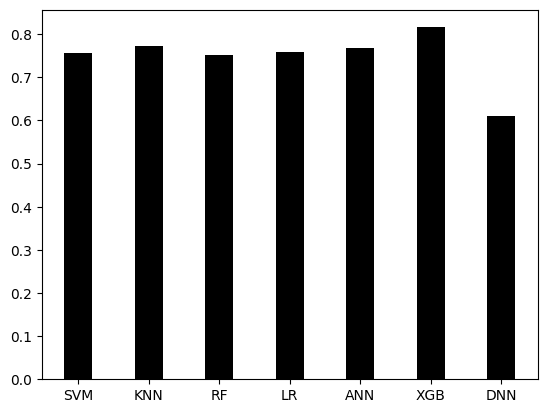

In [45]:
import matplotlib.pyplot as plt
plt.bar(acc.index, acc['train'], color ='black',width = 0.4)

In [46]:
m = [ANNmodel, model, knn, lr, rf, svm, xgb, best_model]

label = ["ArtificialNeuralNetwork", 'DeepNeuralNetwork',
         'KNearestNeighborsClassifier', 'LogisticRegression',
         'RandomForestClassifier', 'SupportVectorClassifier',
         'XGBoost', type(best_model).__name__, type(sbest_model).__name__ ]

acc = pd.DataFrame(
    {
    "ANN":[ATr,ATe, SCVATr,SCVATe],
    "DNN":[DTr,DTe, SCVDTr,SCVDTe],
    "KNN":[KTr,KTe, SCVKTr,SCVKTe],
    "LR" :[LTr,LTe, SCVLTr,SCVLTe],
    "RF" :[RTr,RTe, SCVRTr,SCVRTe],
    "SVM":[STr,STe, SCVSTr,SCVSTe],
    "XGB":[XTr,XTe, SCVXTr,SCVXTe],
    "H_OD":[HATr.accuracy()[0][1],HATe.accuracy()[0][1], SCVHATr.accuracy()[0][1], SCVHATe.accuracy()[0][1]],
    "H_SOD":[sHATr.accuracy()[0][1],sHATe.accuracy()[0][1], SCVsHATr.accuracy()[0][1], SCVsHATe.accuracy()[0][1]]
    })
acc.index = ["train", "test", "SCVTrain", "SCVTest"]
acc = acc.T
acc['Model'] = label

acc = acc[['Model', 'train', 'test', "SCVTrain", "SCVTest"]]
#acc['avg'] = round((acc['train'] + acc['test'])/2, 6)
#acc[acc["avg"] == acc["avg"].max()]
#acc['BestModel'] = 0

acc["Precision"] = np.zeros(len(acc))
acc["Recall"]    = np.zeros(len(acc))
acc["F1_Score"]  = np.zeros(len(acc))



In [47]:
acc

,Model,train,test,SCVTrain,SCVTest,Precision,Recall,F1_Score
ANN,ArtificialNeuralNetwork,0.768000,0.7600,0.765225,0.7659,0.0,0.0,0.0
DNN,DeepNeuralNetwork,0.610500,0.6015,0.604375,0.6065,0.0,0.0,0.0
KNN,KNearestNeighborsClassifier,0.772750,0.7375,0.830125,0.6880,0.0,0.0,0.0
LR,LogisticRegression,0.759875,0.7620,0.760875,0.7565,0.0,0.0,0.0
RF,RandomForestClassifier,0.751875,0.7485,0.755625,0.7470,0.0,0.0,0.0
SVM,SupportVectorClassifier,0.757125,0.7550,0.756700,0.7567,0.0,0.0,0.0
XGB,XGBoost,0.816125,0.7515,0.825375,0.7505,0.0,0.0,0.0
H_OD,H2OXGBoostEstimator,0.923125,0.7330,0.923125,0.7330,0.0,0.0,0.0
H_SOD,H2ODeepLearningEstimator,0.404000,0.3980,0.476750,0.4540,0.0,0.0,0.0


In [48]:
acc

,Model,train,test,SCVTrain,SCVTest,Precision,Recall,F1_Score
ANN,ArtificialNeuralNetwork,0.768000,0.7600,0.765225,0.7659,0.0,0.0,0.0
DNN,DeepNeuralNetwork,0.610500,0.6015,0.604375,0.6065,0.0,0.0,0.0
KNN,KNearestNeighborsClassifier,0.772750,0.7375,0.830125,0.6880,0.0,0.0,0.0
LR,LogisticRegression,0.759875,0.7620,0.760875,0.7565,0.0,0.0,0.0
RF,RandomForestClassifier,0.751875,0.7485,0.755625,0.7470,0.0,0.0,0.0
SVM,SupportVectorClassifier,0.757125,0.7550,0.756700,0.7567,0.0,0.0,0.0
XGB,XGBoost,0.816125,0.7515,0.825375,0.7505,0.0,0.0,0.0
H_OD,H2OXGBoostEstimator,0.923125,0.7330,0.923125,0.7330,0.0,0.0,0.0
H_SOD,H2ODeepLearningEstimator,0.404000,0.3980,0.476750,0.4540,0.0,0.0,0.0


In [49]:
y_pred_ANNn = []
y_pred_DNNn = []
for i in range(len(y_pred_ANN)):
  y_pred_ANNn.append(y_pred_ANN[i][0])
  y_pred_DNNn.append(y_pred_DNN[i][0])

In [50]:
pred = [np.array(y_pred_ANNn), np.array(y_pred_DNNn), y_pred_knn,
        y_pred_lr, y_pred_rf,
        y_pred_svm, y_pred_xgb, y_pred_h2o, y_pred_sh2o]

tes  = [y_test_indi_ML, np.array(Dy_test), y_test_indi_ML, y_test_indi_ML,
        y_test_indi_ML, y_test_indi_ML, y_test_indi_ML,
        y_test_h2o.copy(), y_test_sh2o.copy()]

In [51]:
tes

[array([0, 0, 1, ..., 0, 0, 1]),
 array([1, 1, 0, ..., 1, 1, 1]),
 array([0, 0, 1, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 0, 1]),
 array([1, 1, 0, ..., 1, 1, 1], dtype=int32),
 array([1, 1, 0, ..., 1, 1, 1])]

In [52]:
acc.iloc[:,5]

,Precision
ANN,0.0
DNN,0.0
KNN,0.0
LR,0.0
RF,0.0
SVM,0.0
XGB,0.0
H_OD,0.0
H_SOD,0.0


In [53]:
for i in range(len(pred)):
  p,r,f,_ = precision_recall_fscore_support(tes[i], pred[i],
                                            average='macro',zero_division=0)
  acc.iloc[i,5]= p
  acc.iloc[i,6]= r
  acc.iloc[i,7]= f
  p = 0
  r = 0
  f = 0
acc

,Model,train,test,SCVTrain,SCVTest,Precision,Recall,F1_Score
ANN,ArtificialNeuralNetwork,0.768000,0.7600,0.765225,0.7659,0.752789,0.733338,0.739265
DNN,DeepNeuralNetwork,0.610500,0.6015,0.604375,0.6065,0.461412,0.496981,0.389262
KNN,KNearestNeighborsClassifier,0.772750,0.7375,0.830125,0.6880,0.725610,0.713711,0.717754
LR,LogisticRegression,0.759875,0.7620,0.760875,0.7565,0.758340,0.731338,0.738462
RF,RandomForestClassifier,0.751875,0.7485,0.755625,0.7470,0.738688,0.723206,0.728166
SVM,SupportVectorClassifier,0.757125,0.7550,0.756700,0.7567,0.750533,0.723537,0.730413
XGB,XGBoost,0.816125,0.7515,0.825375,0.7505,0.741120,0.728403,0.732807
H_OD,H2OXGBoostEstimator,0.923125,0.7330,0.923125,0.7330,0.704559,0.713843,0.704754
H_SOD,H2ODeepLearningEstimator,0.404000,0.3980,0.476750,0.4540,0.195750,0.500000,0.281351


<BarContainer object of 9 artists>

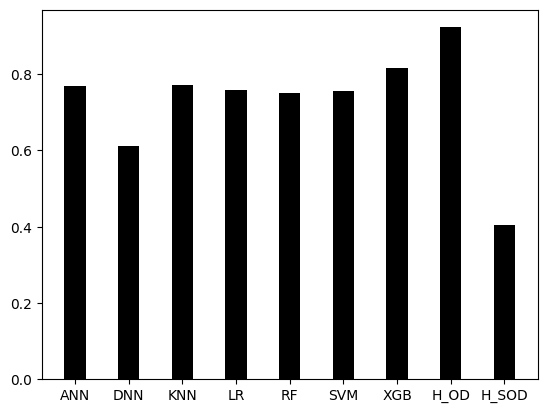

In [54]:
import matplotlib.pyplot as plt
plt.bar(acc.index, acc['train'], color ='black',width = 0.4)

In [55]:
from sklearn.metrics import roc_auc_score, roc_curve

In [56]:
m = [ANNmodel, model, knn, lr, rf, svm, xgb, best_model]

In [57]:
#encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
y_test_indi_ML = y_test.copy()

In [58]:
from sklearn import metrics

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


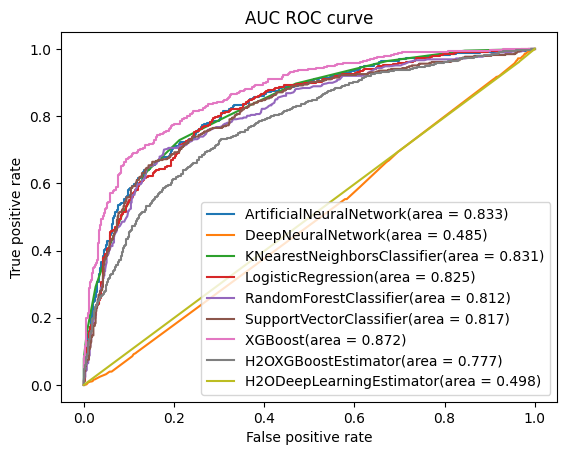

In [59]:
plt.figure(1)
plt.rcParams["figure.figsize"] = [10, 5]

y_pred = ANNmodel.predict(X_test).ravel()
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[0]) + '(area = {:.3f})'.format(auc))

y_pred = model.predict(DX_test).ravel()
y_test = Dy_test.copy()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[1]) + '(area = {:.3f})'.format(auc))

y_pred = knn.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[2]) + '(area = {:.3f})'.format(auc))

y_pred = lr.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[3]) + '(area = {:.3f})'.format(auc))

y_pred = rf.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[4]) + '(area = {:.3f})'.format(auc))

y_pred = svm.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[5]) + '(area = {:.3f})'.format(auc))

y_pred = xgb.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[6]) + '(area = {:.3f})'.format(auc))

y_pred = pd.DataFrame(h2o.as_list(best_model.predict(valid)))
y_test = h2o.as_list(valid['diagnosis'])
fpr, tpr, thresholds = roc_curve(y_test, y_pred["p1"])
auc = metrics.roc_auc_score(y_test, y_pred["p1"])
plt.plot(fpr, tpr,label=type(best_model).__name__ + '(area = {:.3f})'.format(auc))

y_pred = pd.DataFrame(h2o.as_list(sbest_model.predict(svalid)))
y_test = h2o.as_list(svalid['y_test'])
fpr, tpr, thresholds = roc_curve(y_test, y_pred["p1"])
auc = metrics.roc_auc_score(y_test, y_pred["p1"])
plt.plot(fpr, tpr,label=type(sbest_model).__name__ + '(area = {:.3f})'.format(auc))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC ROC curve')
plt.legend(loc='best')
plt.show()

In [60]:
tm = [aend,dend,kend,lend,rend,send,xend,autoend,sautoend]

In [61]:
acc['time'] = 0

In [62]:
acc['time'] = tm

In [63]:
acc

,Model,train,test,SCVTrain,SCVTest,Precision,Recall,F1_Score,time
ANN,ArtificialNeuralNetwork,0.768000,0.7600,0.765225,0.7659,0.752789,0.733338,0.739265,8.758650
DNN,DeepNeuralNetwork,0.610500,0.6015,0.604375,0.6065,0.461412,0.496981,0.389262,306.216133
KNN,KNearestNeighborsClassifier,0.772750,0.7375,0.830125,0.6880,0.725610,0.713711,0.717754,0.001341
LR,LogisticRegression,0.759875,0.7620,0.760875,0.7565,0.758340,0.731338,0.738462,0.309331
RF,RandomForestClassifier,0.751875,0.7485,0.755625,0.7470,0.738688,0.723206,0.728166,1.132361
SVM,SupportVectorClassifier,0.757125,0.7550,0.756700,0.7567,0.750533,0.723537,0.730413,27.851316
XGB,XGBoost,0.816125,0.7515,0.825375,0.7505,0.741120,0.728403,0.732807,2.442899
H_OD,H2OXGBoostEstimator,0.923125,0.7330,0.923125,0.7330,0.704559,0.713843,0.704754,238.165231
H_SOD,H2ODeepLearningEstimator,0.404000,0.3980,0.476750,0.4540,0.195750,0.500000,0.281351,1815.233582


In [64]:
acc.to_csv("Result_of_Gaussion_Cop_Data.csv")